In [21]:
import pandas as pd
import geopandas as gpd
import json
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt

In [17]:
weighted_df = pd.read_csv('Basin_value.csv')

geodf = gpd.read_file('WRA_SubBasins_v2_added_variables.shx')
geodf.to_file("Kenya_SubBasins_geojson_file", driver = "GeoJSON")
with open("Kenya_SubBasins_geojson_file") as geofile:
    j_file = json.load(geofile)

basin_numbers = weighted_df['Basin_ID2'].tolist()
   
i=1
count=0
for feature in j_file["features"]:
    feature ['id'] = str(i).zfill(2)
    i += 1
    count+=1
#print(count)
#print(len(basin_numbers))
#geodf = geodf.merge(weighted_df, on='Basin_ID2')

#result = geodf.tail(50)
#print(result)
shapefile= gpd.read_file('WRA_SubBasins_v2_added_variables.shp')
shapefile.tail(10)

c:\Users\carol\anaconda3\envs\top\Lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


,OBJECTID_1,Basin,Area,Shape_Leng,Shape_Area,Basin_ID2,GoK_pr_01,geometry
198,199,None,0.424967,0.025859,0.000035,199,0,"POLYGON Z ((39.24974 -4.61625 0, 39.24919 -4.6..."
199,200,None,0.238128,0.017685,0.000019,200,0,"POLYGON Z ((39.23782 -4.62905 0, 39.2372 -4.62..."
200,201,None,0.178596,0.018171,0.000015,201,0,"POLYGON Z ((39.26582 -4.61201 0, 39.26431 -4.6..."
201,202,None,0.316981,0.027040,0.000026,202,0,"POLYGON Z ((39.22995 -4.63912 0, 39.22904 -4.6..."
202,203,None,0.645331,0.040525,0.000053,203,0,"POLYGON Z ((39.22991 -4.65162 0, 39.22981 -4.6..."
203,204,None,0.180374,0.014891,0.000015,204,0,"POLYGON Z ((39.21845 -4.64492 0, 39.21683 -4.6..."
204,205,None,1.681297,0.050268,0.000137,205,0,"POLYGON Z ((39.30294 -4.59017 0, 39.30183 -4.5..."
205,206,None,0.161109,0.018192,0.000013,206,0,"POLYGON Z ((39.56612 -4.03469 0, 39.56588 -4.0..."
206,207,None,0.327600,0.024208,0.000027,207,0,"POLYGON Z ((39.97903 -3.36497 0, 39.97856 -3.3..."
207,208,None,49.319356,0.578812,0.004008,208,0,"POLYGON Z ((40.92641 -2.31788 0, 40.9235 -2.31..."


<Axes: >

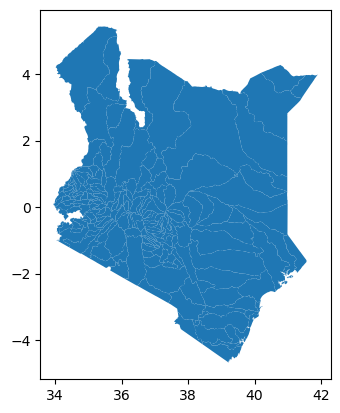

In [18]:
shapefile.plot()

In [19]:
shapefile = shapefile.merge(weighted_df, on='Basin_ID2')

<Axes: >

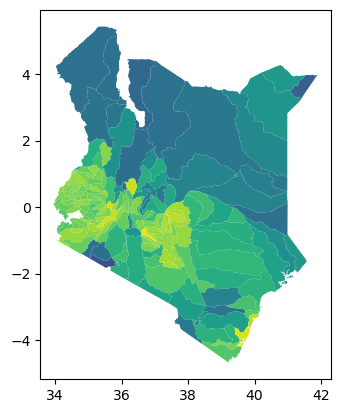

In [20]:
shapefile.plot(column='Overall_score')

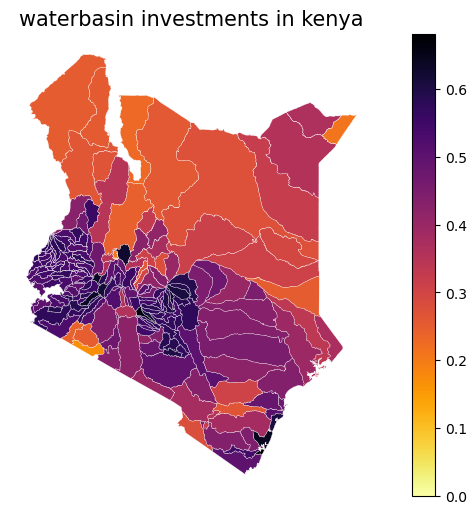

In [32]:
weighted_df = pd.read_csv('Basin_value.csv')
shapefile= gpd.read_file('WRA_SubBasins_v2_added_variables.shp')
shapefile = shapefile.merge(weighted_df, on='Basin_ID2')
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('waterbasin investments in kenya', fontdict={'fontsize': '15', 'fontweight' : '3'})

shapefile.plot(column='Overall_score',
            cmap='inferno_r',
            linewidth=0.2,
            ax=ax,
            edgecolor='1',
            legend=True, missing_kwds={
            "color": "lightgrey",
            "label": "Missing values",},)
fig.savefig('look_at_this_graph.jpg', dpi=300)